In [1]:
import numpy as np
import pandas as pd

In [2]:
# Lets work on simple dataset (Female birth Dataset)
# The source of the dataset is credited to Newton (1988).
female = pd.read_csv('C:/Users/Abhi/Desktop/CSV files/Women_birth.csv')
female.head()

,Date,Births
0,01-01-1959,35
1,02-01-1959,32
2,03-01-1959,30
3,04-01-1959,31
4,05-01-1959,44


In [3]:
# Find min & max date to get the date range
pd.to_datetime(female['Date']).max()-pd.to_datetime(female['Date']).min()

Timedelta('364 days 00:00:00')

In [4]:
# Change datatype of Date column to Datetime
female['Date'] = pd.to_datetime(female['Date'])


In [5]:
# Create helper columns
female['Month'] = female.Date.dt.month
female['Day'] = female.Date.dt.day
female['Year'] = female.Date.dt.year
female['Week Number'] =female.Date.dt.isocalendar().week
female['Day Of Week'] = female.Date.dt.dayofweek
female['Day Name']=pd.to_datetime(female['Date']).dt.day_name()
female['Month Name']=pd.to_datetime(female['Date']).dt.month_name()
# OR We can use below lines of code as well
female['Month'] = female.Date.apply(lambda x:x.month)
female['Day'] = female.Date.apply(lambda x:x.day)
female['Year'] = female.Date.apply(lambda x:x.year)
female['Week Number'] =female.Date.apply(lambda x:x.week)
female['Day Of Week'] = female.Date.apply(lambda x:x.dayofweek)
female['Day Name']=pd.to_datetime(female['Date']).apply(lambda x:x.day_name())
female['Month Name']=pd.to_datetime(female['Date']).apply(lambda x:x.month_name())
female.head()

,Date,Births,Month,Day,Year,Week Number,Day Of Week,Day Name,Month Name
0,1959-01-01,35,1,1,1959,1,3,Thursday,January
1,1959-02-01,32,2,1,1959,5,6,Sunday,February
2,1959-03-01,30,3,1,1959,9,6,Sunday,March
3,1959-04-01,31,4,1,1959,14,2,Wednesday,April
4,1959-05-01,44,5,1,1959,18,4,Friday,May


In [6]:
#Total female births in the month of January
female[female['Month Name'] =='January']['Births'].sum()

1270

In [7]:
# Total female births in each month using for loop
for i in female['Month Name'].unique():
 print('Female births in {0} : {1}'.format(i,female[female['Month Name'] ==i]['Births'].sum()))

Female births in January : 1270
Female births in February : 1179
Female births in March : 1250
Female births in April : 1193
Female births in May : 1305
Female births in June : 1214
Female births in July : 1297
Female births in August : 1308
Female births in September : 1388
Female births in October : 1298
Female births in November : 1311
Female births in December : 1310


In [8]:
#Using "group by" to get female births in each month
female.groupby('Month Name').sum()[['Births']] # Month Name column data is not in ascending order.

,Births
Month Name,
April,1193
August,1308
December,1310
February,1179
January,1270
July,1297
June,1214
March,1250
May,1305


<AxesSubplot:xlabel='Month Name'>

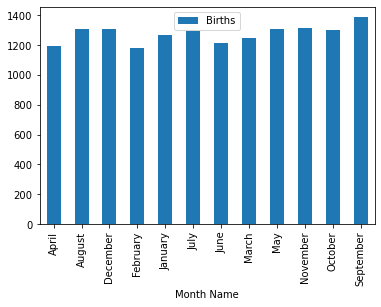

In [9]:
# Use Pivot table to get female births in each month
pd.pivot_table(female,values=['Births'],index=['Month Name'],aggfunc=np.sum) # Month Name data is not in proper order.
pd.pivot_table(female,values=['Births'],index=['Month Name'],aggfunc=np.sum).plot.bar()

In [10]:
# We will convert "Month Name" column into Categorical variable and specify the ordering
order = ['January','February','March','April','May','June',
 'July','August','September','October','November','December']
female['Month Name']=pd.Categorical(female['Month Name'],order)

In [11]:
female.groupby('Month Name').sum()[['Births']] # Now the output is much better after custom ordering


,Births
Month Name,
January,1270
February,1179
March,1250
April,1193
May,1305
June,1214
July,1297
August,1308
September,1388


In [13]:
import matplotlib.pyplot as plt

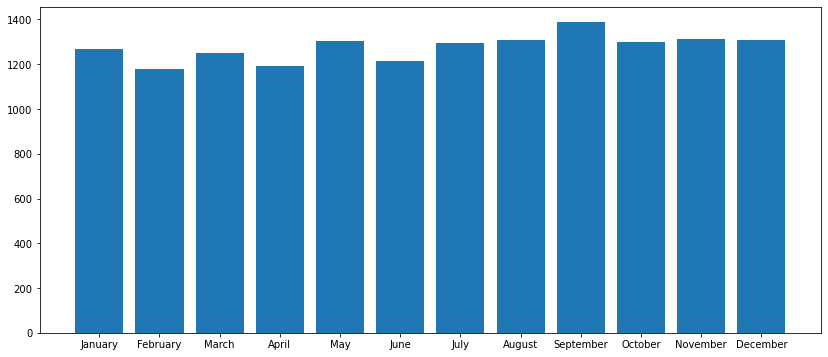

In [14]:
# Bar plot to get monthly female births using matplotlib library
plt.figure(figsize=(14,6))
plt.bar(female.groupby('Month Name').sum().index,female.groupby('Month Name').sum()['Births'])
plt.show()

<AxesSubplot:xlabel='Month Name'>

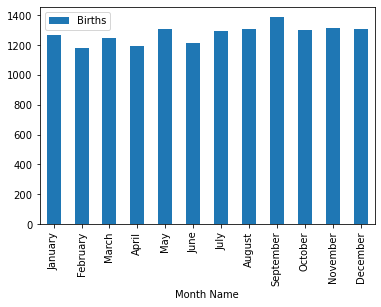

In [15]:
# Bar plot to get monthly female births using Pandas
pd.pivot_table(female,values=['Births'],index=['Month Name'],aggfunc=np.sum).plot.bar()

In [16]:
#Same way we can implement custom ordering for Day Name field
order=[ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
female['Day Name']=pd.Categorical(female['Day Name'],order)
female.groupby('Day Name').sum()[['Births']] 


,Births
Day Name,
Monday,2185
Tuesday,2273
Wednesday,2302
Thursday,2201
Friday,2200
Saturday,2126
Sunday,2036


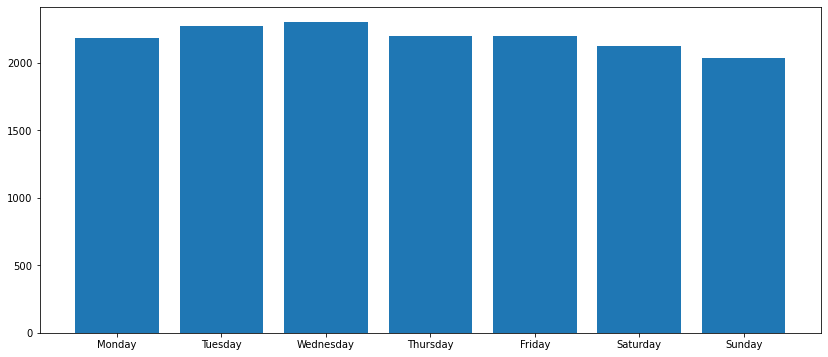

In [17]:
# Plot Bar Graph to show female births on day basis.
plt.figure(figsize=(14,6))
plt.bar(female.groupby('Day Name').sum().index,female.groupby('Day Name').sum()['Births'])
plt.show()


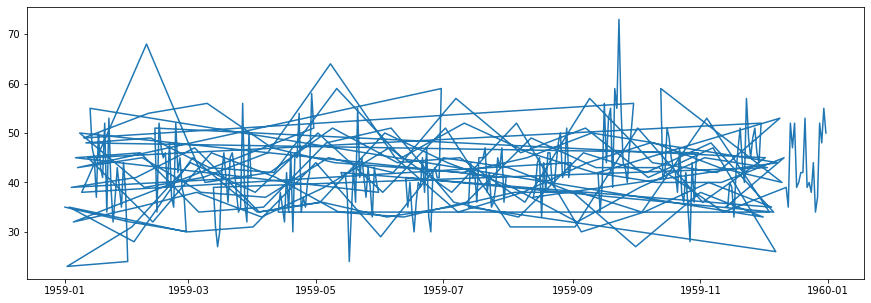

In [18]:
# Daily female births
plt.figure(figsize=(15,5))
plt.plot(female['Date'],female['Births'])

In [ ]:
#29